# Introduction

In this following challenge, we will analyze information about flights that departed from NYC airports in 2013. <br> <br>
We will first import and clean up any anomalies, before studying flight delays. <br> 
More precisely, we will first try to understand the relationship between a flight distance and its delay. <br> 
We will then compare NYC airports on flights delay.

# Environment setup and data import

### Import modules

In [2]:
import os 

import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats

### Styling settings

**Custom color theme**

In [3]:
cyan_shades = ['#0f191a','#1d3234','#2a474b','#3b6368',
               '#497c83','#58959d','#6fa7ae','#89b7bd',
               '#97bfc4','#a4c7cc','#b1cfd3','#bed7da',
               '#cbdfe2','#d8e7e9','#e5eff0','#f3f6f7']

cyan_tones1 = ['#9ecfc2','#afd7cd','#c0e0d7','#d1e8e2',
               '#e2f1ed','#b5f3e3','#c6f5e9','#d7f8f0',
               '#e8fbf6','#f8fefd','#f7fcfb']

cyan_tones2 = ['#83eaea','#94eded','#a5f0f0','#b5f3f3',
               '#c6f5f5','#d7f8f8','#e8fbfb','#f8fefe']

orange_shades = ['#7a2900','#a93900','#cc4400','#f55200',
                 '#ff5c0a','#ff691f','#ff7733','#ff8547',
                 '#ff925c','#ffa070','#ffad85','#ffbb99',
                 '#ffc9ad','#ffd6c2','#ffe4d6','#fff1eb']

orange_tones = ['#fb2c0a','#fb3c1d','#fb4d31','#fc5d44',
                 '#fc6e57','#fc7f6a','#fd8f7e','#fda091',
                 '#fdb1a4','#fec1b8','#fed2cb','#fee3de',
                 '#fff3f1']


cyan_compl = ['#73ABB0','#436876', '#FFDA63', #LGA 
              '#63B9D5', '#5CCFDB', #EWR
              '#4FB9BA','#CAF1C5', #JFK 
              '#CAF1C5']


**Change some figure parameters:**

In [4]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

rcParams['axes.labelsize'] = 'medium'
rcParams['axes.labelweight'] = 550
rcParams['axes.labelpad'] = 8

**Change Pandas DataFrame display option**

In [5]:
pd.options.display.float_format = '{:.2f}'.format  # display only 2 decimals

## Import data files

**Getting the local relative data path:**

In [6]:
working_directory = os.getcwd()
data_directory = os.path.join(working_directory, 'Data')

print('List of files in Data directory: \n', os.listdir(data_directory), sep='')

List of files in Data directory: 
['airlines.csv', 'weather.csv', 'airports.csv', 'flights.csv']


**Create a ../Figure directory inside our working directory:**

In [7]:
try:
    os.mkdir(os.path.join(working_directory, 'Figures'))
except FileExistsError as e:
    print('Folder ../Figures already created.')

Folder ../Figures already created.


**Get the data files full path:**

In [8]:
airlines_path = os.path.join(data_directory, 'airlines.csv')
airports_path = os.path.join(data_directory, 'airports.csv')
flights_path  = os.path.join(data_directory, 'flights.csv')
weather_path  = os.path.join(data_directory, 'weather.csv')

**Create Pandas DataFrames with *.csv* files:**

In [9]:
airlines_df = pd.read_csv(airlines_path)
airports_df = pd.read_csv(airports_path)
flights_df  = pd.read_csv(flights_path)
weather_df  = pd.read_csv(weather_path)

# Familiarize with the data

**First rows:**

In [10]:
flights_df.head()

,year,month,day,departure,scheduled_departure,arrival,scheduled_arrival,carrier,flight_id,origin,destination,distance
0,2013,1,1,517.00,515,830.00,819,UA,1545,EWR,IAH,1400
1,2013,1,1,533.00,529,850.00,830,UA,1714,LGA,IAH,1416
2,2013,1,1,542.00,540,923.00,850,AA,1141,JFK,MIA,1089
3,2013,1,1,544.00,545,1004.00,1022,B6,725,JFK,BQN,1576
4,2013,1,1,554.00,600,812.00,837,DL,461,LGA,ATL,762


**Last rows:**

In [11]:
flights_df.tail()

,year,month,day,departure,scheduled_departure,arrival,scheduled_arrival,carrier,flight_id,origin,destination,distance
336771,2013,9,30,nan,1455,nan,1634,9E,3393,JFK,DCA,213
336772,2013,9,30,nan,2200,nan,2312,9E,3525,LGA,SYR,198
336773,2013,9,30,nan,1210,nan,1330,MQ,3461,LGA,BNA,764
336774,2013,9,30,nan,1159,nan,1344,MQ,3572,LGA,CLE,419
336775,2013,9,30,nan,840,nan,1020,MQ,3531,LGA,RDU,431


**Notes:** <br>
Already a few *nan* values spotted for departure and arrival variables.  

**Summary statistics:**

In [12]:
flights_df.describe()

,year,month,day,departure,scheduled_departure,arrival,scheduled_arrival,flight_id,distance
count,336776.00,336776.00,336776.00,328521.00,336776.00,328063.00,336776.00,336776.00,336776.00
mean,2013.00,6.55,15.71,1349.11,1344.25,1502.17,1536.38,1971.92,1039.91
std,0.00,3.41,8.77,488.28,467.34,533.27,497.46,1632.47,733.23
min,2013.00,1.00,1.00,1.00,106.00,1.00,1.00,1.00,17.00
25%,2013.00,4.00,8.00,907.00,906.00,1104.00,1124.00,553.00,502.00
50%,2013.00,7.00,16.00,1401.00,1359.00,1536.00,1556.00,1496.00,872.00
75%,2013.00,10.00,23.00,1744.00,1729.00,1941.00,1945.00,3465.00,1389.00
max,2013.00,12.00,31.00,2400.00,2359.00,2440.00,2359.00,8500.00,4983.00


**Number of unique values, by variable:**

In [13]:
flights_df.nunique()

year                      1
month                    12
day                      31
departure              1318
scheduled_departure    1021
arrival                1829
scheduled_arrival      1163
carrier                  16
flight_id              3844
origin                    4
destination             105
distance                214
dtype: int64

**Notes:** <br>
- All *year* values are 2013. <br>
- *month* is ranging from 1 to 12, with 12 unique values, a mean of 6.55 and a standard deviation of 3.41. This indicate a fairly distributed and symetric data set over the year 2013. <br>
- *day* is ranging from 1 to 31, with 31 unique values. Everything looking pretty normal regarding our date variables.
- *departure* values ranging from 1 to 2400. At first glance, looking like *HHMM* time format. 
- *scheduled_departure*, *arrival* and *scheduled_arrival* of the same nature as *departure*. 
- *arrival* max values = 2440, meaning that if our format is *HHMM*, there may be encoding error of 24xx format instead of 00xx for after midnight time values. We will inspect this later below.
- *distance* variable is ranging from 17 to 4983, with a mean of 1039.91, and only 214 unique values, probably corresponding to our finite flights possibilities between existing airports. Then, these distance values may be theoritical distances between airports, rather than the actual distances travelled by aircraft. We would otherwise observe certainly much more than 214 unique distances.
- 4 different *origin* and 105 *destination*, with a 3 letter code corresponding to airports. 


# Data pre-processing

**Create a new clean copy of the flights DataFrame:**

In [14]:
flights_df_clean = flights_df.copy()

## Null values

**Total number of null values in dataframe:**

In [15]:
flights_df_clean.isnull().sum().sum()

16968

**Number of null values by variable:**

In [16]:
flights_df_clean.isnull().sum()

year                      0
month                     0
day                       0
departure              8255
scheduled_departure       0
arrival                8713
scheduled_arrival         0
carrier                   0
flight_id                 0
origin                    0
destination               0
distance                  0
dtype: int64

**Number of rows with ≥1 null value**

In [17]:
flights_df_clean.isnull().any(axis=1).sum()

8713

**Notes:** <br>
- 16968 null values in total. <br> 
- The null values in departure column are in the same rows as the 8713 missing values in arrival column. <br>
- Only *departure* and *arrival* columns have null values, certainly corresponding to cancelled flights. <br>

Before dropping null values, let's analyze them further...

### Heatmap visualization of null values in flights.csv

''

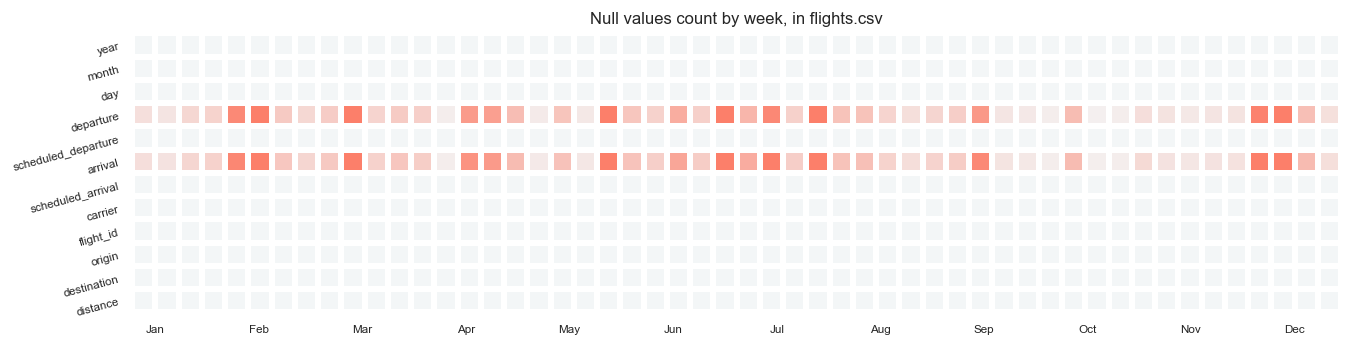

In [18]:
# Set colors
cmap_colors = [cyan_shades[-1], orange_tones[5]]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", cmap_colors)
sns.set_style('white')

# Create temporary date column with week number
flights_df_clean['temp_week'] = pd.to_datetime(flights_df_clean[['year',
                                                                 'month',
                                                                 'day']], errors='coerce').dt.week

# Figure
fig = plt.figure(figsize=(13,6), dpi=120)
plt.title('Null values count by week, in flights.csv', fontsize=10)

# Generate a dataframe with null values count, by week
data = flights_df_clean.isnull().groupby(flights_df_clean['temp_week']).sum().transpose()

# Heatmap plotting
sns.heatmap(data=data.loc['year':'distance'], 
            cbar=False, 
            cmap=cmap, 
            robust=True, 
            linewidths=3,
            square=True,
           )

# Figure parameters
months = pd.to_datetime(range(1, 13), format='%m').month_name().str.slice(stop=3)
plt.xticks(np.linspace(1, 50, 12), months, fontsize=7, rotation=0)
plt.yticks(fontsize=7, rotation=15)
plt.xlabel('')
plt.ylabel('')

# Fix appearance
bottom, top = plt.ylim()  
plt.ylim(bottom+.5, top-.5)  
 
# Save figure    
plt.savefig('Figures/null-values-heatmap-v2.pdf', dpi=300, transparent=True)

# Delete temporary date column with week number
flights_df_clean.drop(columns='temp_week', inplace=True)
;

#### NA values distribution comparison

''

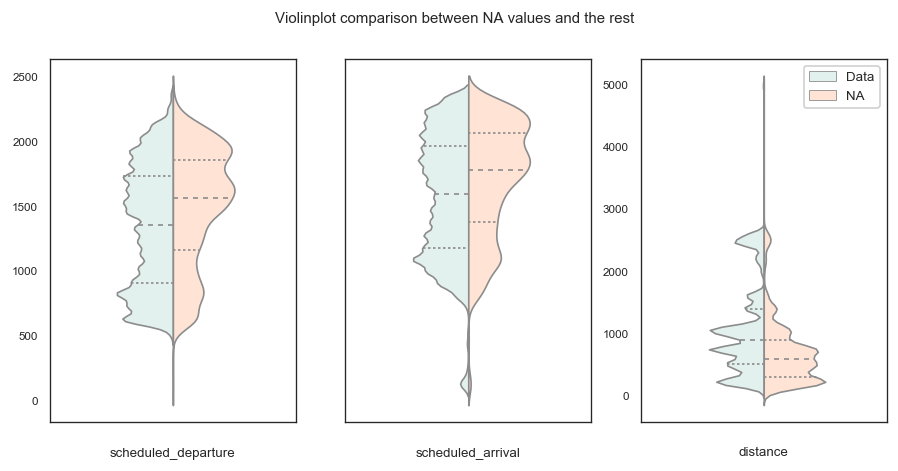

In [19]:
# Set color style
sns.set_palette(sns.color_palette([cyan_tones1[4], orange_shades[-2]]))

# Figure
fig = plt.figure(figsize=(9,4), dpi=120)
fig.suptitle('Violinplot comparison between NA values and the rest', fontsize=9)

# Create temporary boolean column for NA values
flights_df_clean['NA'] = flights_df_clean.isnull().any(axis=1)

# Scheduled_departure violin subplot
plt.subplot(131)
ax1 = sns.violinplot(x='year',  
                     y='scheduled_departure',  
                     hue='NA', 
                     data=flights_df_clean, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1,
                     saturation=1)
ax1.legend_.remove()
ax1.set_xticklabels([])
ax1.set_xlabel('scheduled_departure', fontsize=8)
ax1.set_ylabel('')
plt.yticks(fontsize=7)

# Scheduled_arrival violin subplot
plt.subplot(132)
ax2 = sns.violinplot(x='year', 
                     y='scheduled_arrival',  
                     hue='NA', 
                     data=flights_df_clean, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1,
                     saturation=1)

ax2.legend_.remove()
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.set_xlabel('scheduled_arrival', fontsize=8)

# Distance violin subplot
plt.subplot(133)
ax3 = sns.violinplot(x='year', 
                     y='distance',  
                     hue='NA', 
                     data=flights_df_clean, 
                     split=True,
                     inner="quart", 
                     width=.5,
                     linewidth=1,
                     saturation=1)

ax3.set_xticklabels([])
ax3.set_xlabel('distance', fontsize=8)
ax3.set_ylabel('')
plt.yticks(fontsize=7)

# Set legend
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ["Data", "NA"], loc='upper right', ncol=1, framealpha=.9, prop={'size': 8})

# Save figure    
plt.savefig('Figures/NA-violinplots.pdf', dpi=300, transparency=True)

# Delete temporary boolean column for NA values
flights_df_clean.drop(columns='NA',inplace=True)
;

**Notes:** <br>
- NA values are distributed over the year. <br>
- Those NA values are most likely cancelled flights. <br>
- Trying to keep those rows and impute null values with 0 would lead to a bias in our future analysis. <br>
- Impute those null values with their respective average, or delay conservative values would still affect their distribution, then our future analysis. <br>
- As they represent a rather small part (2.59%) of a rich database, and because those rows are useless for our future delay analysis, dropping rows with any null value is the most reasonable option. <br>

### Dropping Null Values

In [20]:
flights_df_clean.dropna(axis=0, how='any', inplace=True)

## Airports FAA tags anomalies

**Unique origin values:**

In [21]:
for origin in flights_df_clean['origin'].unique():
    print(origin)

EWR
LGA
JFK
ERW


**Check origin airports in the airports data:**

In [22]:
for airport in flights_df['origin'].unique():
    display(airports_df[airports_df['FAA']==airport])

,FAA,name,latitude,longitude,altitude,UTC,DST,timezone
460,EWR,Newark Liberty Intl,40.69,-74.17,18,-5,US standard DST,America/New_York


,FAA,name,latitude,longitude,altitude,UTC,DST,timezone
786,LGA,La Guardia,40.78,-73.87,22,-5,US standard DST,America/New_York


,FAA,name,latitude,longitude,altitude,UTC,DST,timezone
691,JFK,John F Kennedy Intl,40.64,-73.78,13,-5,US standard DST,America/New_York


,FAA,name,latitude,longitude,altitude,UTC,DST,timezone


**Count origin values:**

In [23]:
flights_df_clean.groupby('origin').count().year

origin
ERW     32374
EWR    117445
JFK     76910
LGA    101334
Name: year, dtype: int64

**Notes:** <br>
- No airport with name '*ERW*' in airport list. <br>
- No airport with name '*ERW*' online. <br>
- Looking like a typo mistake, we are tempted to replace '*ERW*' origins by '*EWR*' in our cleaned DataFrame. <br>
- Origin encoded as '*ERW*' represents almost 10% of the dataset (32374 rows). <br>
- Let's analyze and compare distributions of '*ERW*'...

#### Compare ERW with EWR origin

In [24]:
flights_df_clean[['month',
                  'day',
                  'departure',
                  'scheduled_departure',
                  'arrival',
                  'scheduled_arrival',
                  'distance',
                  'origin']].groupby('origin').mean()

,month,day,departure,scheduled_departure,arrival,scheduled_arrival,distance
origin,,,,,,,
ERW,6.50,15.75,1393.11,1394.68,1516.93,1560.25,1281.26
EWR,6.51,15.73,1336.37,1317.80,1492.00,1523.79,1065.23
JFK,6.52,15.77,1400.55,1400.77,1521.56,1563.19,1273.38
LGA,6.68,15.73,1309.97,1303.39,1494.54,1511.77,785.13


**Violin plot comparison between ERW and EWR origin** 

''

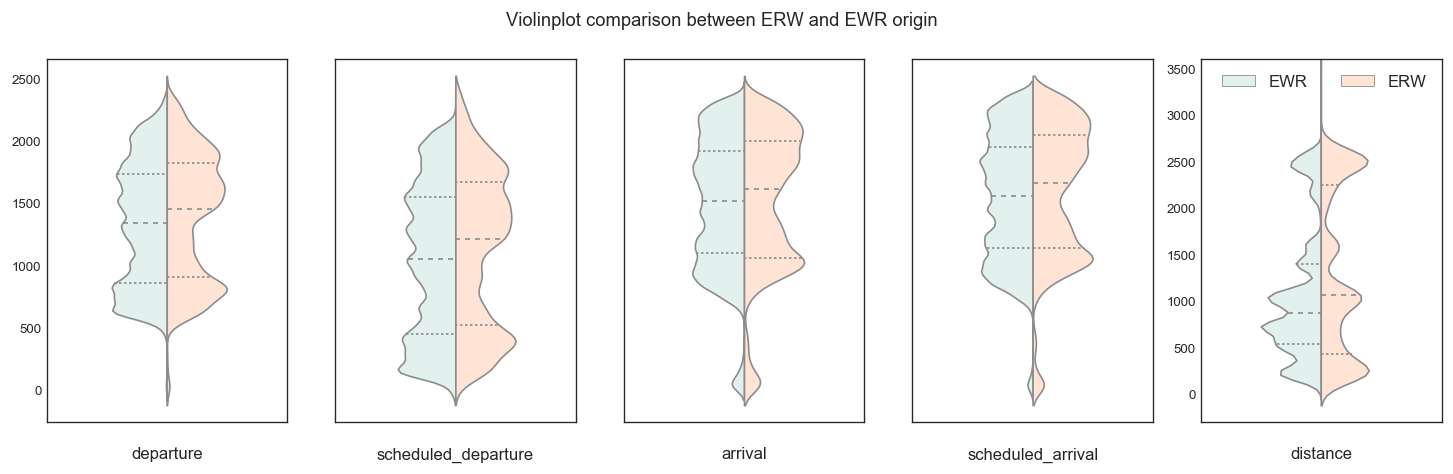

In [25]:
# Set color style
sns.set_palette(sns.color_palette([cyan_tones1[4], orange_shades[-2]]))
sns.set_style('white')

fig = plt.figure(figsize=(15,4), dpi=120)
fig.suptitle('Violinplot comparison between ERW and EWR origin', fontsize=11)

# Create temporary dataframe with only ERW and EWR origins
data_ERW = flights_df_clean[(flights_df_clean['origin']=='ERW') | (flights_df_clean['origin']=='EWR')]

# Departure violin subplot
plt.subplot(151)
ax1 = sns.violinplot(x='year', 
                     y='departure', 
                     hue='origin',
                     data=data_ERW, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1,
                     saturation=1)
ax1.legend_.remove()
ax1.set_xticklabels([])
ax1.set_xlabel('departure')
ax1.set_ylabel('')
ax1.tick_params(axis='y', pad=-.5)
plt.yticks(fontsize=8)

# Scheduled_departure violin subplot
plt.subplot(152)
ax2 = sns.violinplot(x='year',  
                     y='scheduled_departure',  
                     hue='origin', 
                     data=data_ERW, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1,
                     saturation=1)
ax2.legend_.remove()
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('scheduled_departure')
ax2.set_ylabel('')

# Arrival violin subplot
plt.subplot(153)
ax3 = sns.violinplot(x='year', 
                     y='arrival', 
                     hue='origin', 
                     data=data_ERW, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1,
                     saturation=1)
ax3.legend_.remove()
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xlabel('arrival')
ax3.set_ylabel('')

# Scheduled_arrival violin subplot
plt.subplot(154)
ax4 = sns.violinplot(x='year', 
                     y='scheduled_arrival',  
                     hue='origin', 
                     data=data_ERW, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1,
                     saturation=1)
ax4.legend_.remove()
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_xlabel('scheduled_arrival')
ax4.set_ylabel('')

# Distance violin subplot
plt.subplot(155)
ax5 = sns.violinplot(x='year', 
                     y='distance',  
                     hue='origin', 
                     data=data_ERW, 
                     split=True,
                     inner="quart", 
                     width=.5,
                     linewidth=1,
                     saturation=1)

ax5.set_xticklabels([])
ax5.set_xlabel('distance')
ax5.set_ylabel('')
ax5.set_ylim([-300, 3600])
ax5.tick_params(axis='y', pad=-.5)
plt.yticks(fontsize=8)

# Set legend
handles, _ = ax5.get_legend_handles_labels()
ax5.legend(handles, ["EWR", "ERW"], loc='upper right', ncol=2, framealpha=.0)

# Save figure    
plt.savefig('Figures/ERW-origin-violinplots.pdf', dpi=300, transparency=True)

# Delete temporary dataframe 
del data_ERW 
;

**Notes:** <br>
- We observe higher time values for flights with *ERW* than for *EWR*.
- Distance distributions seem different as well. Which is the most surprising, suggesting both data groups may not be from the same airport
- Let's then compare *ERW* distributions with other origin airports:

#### Box plots by origin airports

''

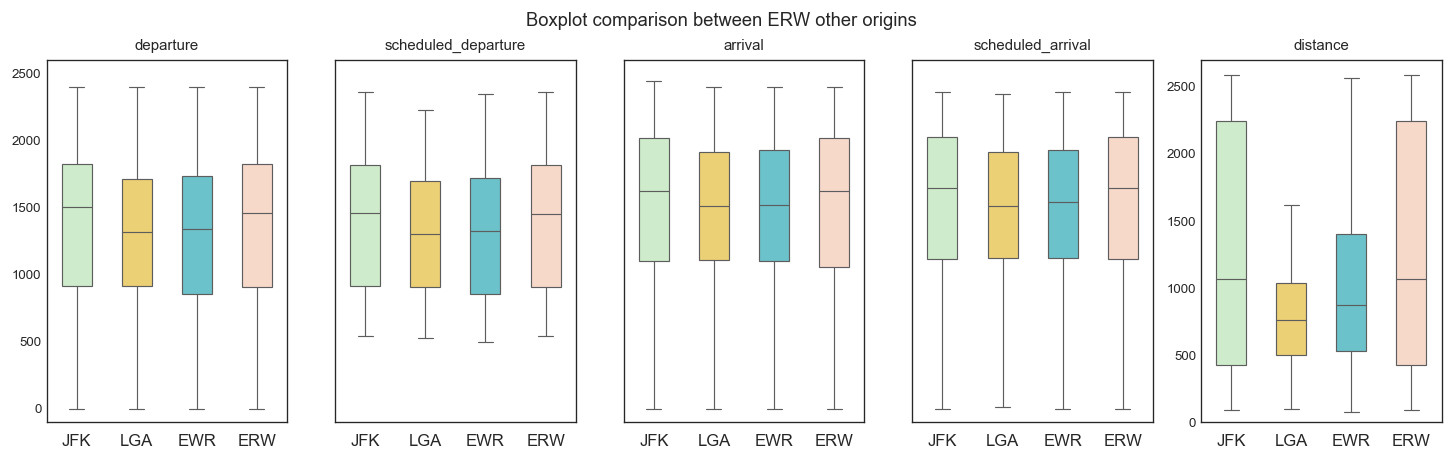

In [26]:
# Set color style
sns.set_palette(sns.color_palette([cyan_compl[-2], cyan_compl[2], cyan_compl[4], orange_shades[-3]]))

# Figure
fig = plt.figure(figsize=(15,4), dpi=120)
fig.suptitle('Boxplot comparison between ERW other origins', fontsize=11)

# Departure box plot
plt.subplot(151)
ax1 = sns.boxplot(x='origin', 
                  y='departure', 
                  data=flights_df_clean, 
                  order=['JFK','LGA','EWR','ERW'], 
                  linewidth=.7,
                  width=.5
                 )

ax1.set_xlabel('')
ax1.set_title('departure', fontsize=9)
ax1.set_ylim([-100, 2600])
ax1.set_ylabel('')
ax1.tick_params(axis='y', pad=-.5)
plt.yticks(fontsize=8)

# Scheduled_departure box plot
plt.subplot(152)
ax2 = sns.boxplot(x='origin',  
                  y='scheduled_departure',  
                  data=flights_df_clean, 
                  order=['JFK','LGA','EWR','ERW'], 
                  linewidth=.7,
                  width=.5
                 )

ax2.set_yticklabels([])
ax2.set_xlabel('')
ax2.set_ylim([-100, 2600])
ax2.set_title('scheduled_departure', fontsize=9)
ax2.set_ylabel('')

# Arrival box plot
plt.subplot(153)
ax3 = sns.boxplot(x='origin', 
                  y='arrival',  
                  data=flights_df_clean,
                  order=['JFK','LGA','EWR','ERW'], 
                  linewidth=.7,
                  width=.5
                 )

ax3.set_yticklabels([])
ax3.set_ylim([-100, 2600])
ax3.set_xlabel('')
ax3.set_title('arrival', fontsize=9)
ax3.set_ylabel('')

# Scheduled_arrival box plot
plt.subplot(154)
ax4 = sns.boxplot(x='origin', 
                  y='scheduled_arrival',  
                  data=flights_df_clean,
                  order=['JFK','LGA','EWR','ERW'],  
                  linewidth=.7,
                  width=.5
                 )

ax4.set_yticklabels([])
ax4.set_xlabel('')
ax4.set_ylim([-100, 2600])
ax4.set_title('scheduled_arrival', fontsize=9)
ax4.set_ylabel('')

# Distance box plot
plt.subplot(155)
ax5 = sns.boxplot(x='origin', 
                  y='distance',   
                  data=flights_df_clean,
                  order=['JFK','LGA','EWR','ERW'],  
                  linewidth=.7,
                  width=.5,
                 )
ax5.set_xlabel('')
ax5.set_title('distance', fontsize=9)
ax5.set_ylabel('')
ax5.set_ylim([0, 2700])
ax5.tick_params(axis='y', pad=-.7)
plt.yticks(fontsize=8)

# Save figure    
plt.savefig('Figures/ERW-4-origins-boxplots.pdf', dpi=300, transparency=True)
;

**Notes:** <br>
- Box plots above are now eye opening on distribution (dis)similarities between airports of origin.
- *ERW* distributions look very different from *EWR*, and really close to *JFK*.
- Let's confirm our observations by computing statistical hypothesis testing, with the null hypothesis that our data samples from different origins have identical expected values/average.

#### Statistical hypothesis testing between origins

In [27]:
descriptive_columns = ['departure','scheduled_departure','arrival','scheduled_arrival','distance']

# Create a dataframe with aggregate functions for our statistical hypothesis testing 
flights_descriptive_origins = flights_df_clean[descriptive_columns+['origin']].groupby('origin').agg(['mean', 
                                                                                                      'std', 
                                                                                                      'count'])
# Create a dataframe to store testing values
ERW_test_col = pd.MultiIndex.from_product([descriptive_columns, ['mean','t_test','p_value']])
ERW_test = pd.DataFrame(index=['ERW','EWR','JFK','LGA'], columns=ERW_test_col)
    
for col in descriptive_columns:
    for origin in ['EWR','JFK','LGA']:
        mean1  = flights_descriptive_origins[col,'mean'].loc[origin]
        std1   = flights_descriptive_origins[col,'std'].loc[origin]
        count1 = flights_descriptive_origins[col,'count'].loc[origin]
    
        mean2  = flights_descriptive_origins[col,'mean'].loc['ERW']
        std2   = flights_descriptive_origins[col,'std'].loc['ERW']
        count2 = flights_descriptive_origins[col,'count'].loc['ERW']
    
        # t-test from scipy
        t_test, p_val = ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=count1, 
                                             mean2=mean2, std2=std2, nobs2=count2)
        
        ERW_test[col,'mean'].loc['ERW'] = mean2
        ERW_test[col,'t_test'].loc['ERW'] = 0
        ERW_test[col,'p_value'].loc['ERW'] = 1

        ERW_test[col,'mean'].loc[origin] = mean1
        ERW_test[col,'t_test'].loc[origin] = t_test
        ERW_test[col,'p_value'].loc[origin] = '{:.1E}'.format(p_val)
    
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(ERW_test)
     

departure                  scheduled_departure                  arrival  \
         mean t_test   p_value                mean t_test   p_value    mean   
ERW    1393.1      0         1              1394.7      0         1  1516.9   
EWR    1336.4  -18.4   1.3E-75              1317.8  -26.1  6.6E-150  1492.0   
JFK    1400.5    2.2   2.6E-02              1400.8    1.9   5.7E-02  1521.6   
LGA    1310.0  -27.4  1.6E-164              1303.4  -31.4  9.7E-216  1494.5   

                    scheduled_arrival                 distance                  
    t_test  p_value              mean t_test  p_value     mean t_test  p_value  
ERW      0        1            1560.3      0        1   1281.3      0        1  
EWR   -7.4  1.9E-13            1523.8  -11.6  3.5E-31   1065.2  -44.6  0.0E+00  
JFK    1.2  2.3E-01            1563.2    0.8  4.2E-01   1273.4   -1.3  1.8E-01  
LGA   -6.9  5.1E-12            1511.8  -15.9  4.1E-57    785.1 -142.6  0.0E+00

**Notes:** <br>
- Those P-values above confirm our observations: *ERW* values are significantly different from *EWR*.
- In fact, we don't take ANY risk (p-value = 0) rejecting the hypothesis that *ERW* and *EWR* have the same expected distance values.
- By fixing a threshold of 1% (0.01), we could not reject any hypothesis test between *JFK* and *ERW* variables. Meaning our variables probably have same average values from *ERW* and *JFK* origins. 
- An encoding mistake of *ERW* instead of *JFK* seems very unlikely and hard to understand. But following our analysis above, we will transform *ERW* into *JFK*.

#### Replace '*ERW*' by '*JFK*'

In [28]:
flights_df_clean.loc[flights_df_clean['origin']=='ERW', 'origin'] = 'JFK'

**Checking *'ERW'* substitution:**

In [29]:
flights_df_clean['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

## Date anomalies

**Trying to create a single date column**

In [30]:
try:
    flights_df_clean['date'] = pd.to_datetime(flights_df[['year','month','day']])
except ValueError as e:
    print(e)

cannot assemble the datetimes: day is out of range for month


**Notes:** <br>
- Error raised while trying to create a new date column. <br>
- *Day is out of range for month*, meaning a certain value of day does not exist in a corresponding month. <br>

Let's inspect...

**Checking the dates statistics:**

In [31]:
flights_df_clean[['year', 'month', 'day']].agg(['nunique', 
                                                'mean', 
                                                'median', 
                                                'min', 
                                                'max'])

,year,month,day
nunique,1.00,12.00,31.00
mean,2013.00,6.56,15.74
median,2013.00,7.00,16.00
min,2013.00,1.00,1.00
max,2013.00,12.00,31.00


**Number of unique values for every month:**

In [32]:
flights_df.groupby('month').nunique()['day']

month
1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: day, dtype: int64

**Notes:** <br>
- Nothing wrong with those day and month values. <br>
- Let's use visualization to try and spot the issue...

#### Heatmap visualization of dates count values

''

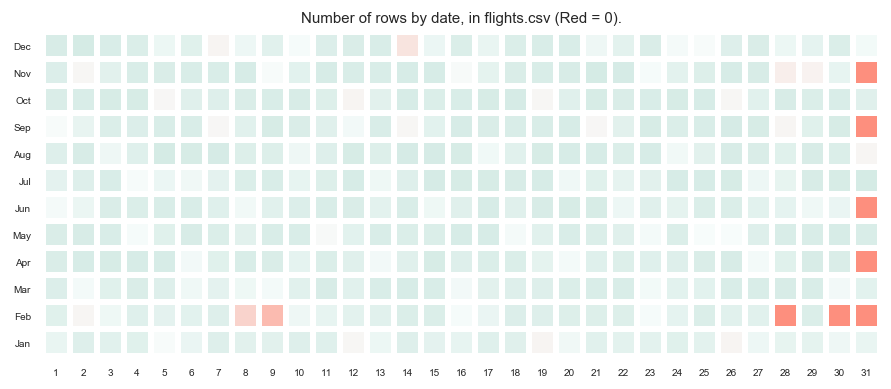

In [33]:
# Define colormap
cmap_colors = [orange_tones[6], cyan_tones1[-1], cyan_tones1[0]]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", cmap_colors)

fig = plt.figure(figsize=(9, 5), dpi=120)
plt.title('Number of rows by date, in flights.csv (Red = 0).', fontsize=9)

# Reshape the flights DataFrame for visualization
data = pd.pivot_table(flights_df_clean.fillna(value=0), 
                      index='month', 
                      columns='day', 
                      values='distance', 
                      aggfunc='count')

# Plot the heatmap
ax = sns.heatmap(data.fillna(0), 
                 cmap=cmap, 
                 vmin=0, 
                 vmax=1450, 
                 linewidths=3, 
                 square=True, 
                 cbar=False
                )

# Invert y-axis order, and set month labels
ax.invert_yaxis()
ax.set_yticklabels(pd.to_datetime(range(1, 13), format='%m').month_name().str.slice(stop=3), 
                   rotation=0)

# Set our figure parameters
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('')
plt.ylabel('')

# Fix the bug that cuts off half top and bottom of seaborn heatmap
bottom, top = plt.ylim()  
plt.ylim(bottom-.5, top+.5)  
 
# Save our figure    
plt.savefig('Figures/dates-heatmap-v2.pdf', dpi=300, transparency=True)
;


**Date issue spotted:** <br>
- No values on Feb. 28th, but for Feb. 29th, which did not exist in 2013. <br>
- At first glance, this looks like an encoding error. <br>
- It would be tempting to keep the Feb. 29th rows, and replace the date by Feb. 28th. <br>
- Before doing so, let's analyze and compare Feb. 29th data with the rest.

**Create a boolean column *'feb_29'* to ease visualizations:**

In [34]:
flights_df_clean['feb_29'] = (flights_df_clean['month'] == 2) & (flights_df_clean['day'] == 29)

#### Violin plots of Feb. 29th against rest of the year data

Because encoding mistake may be related to the origin airport, let's compare distributions by origin

''

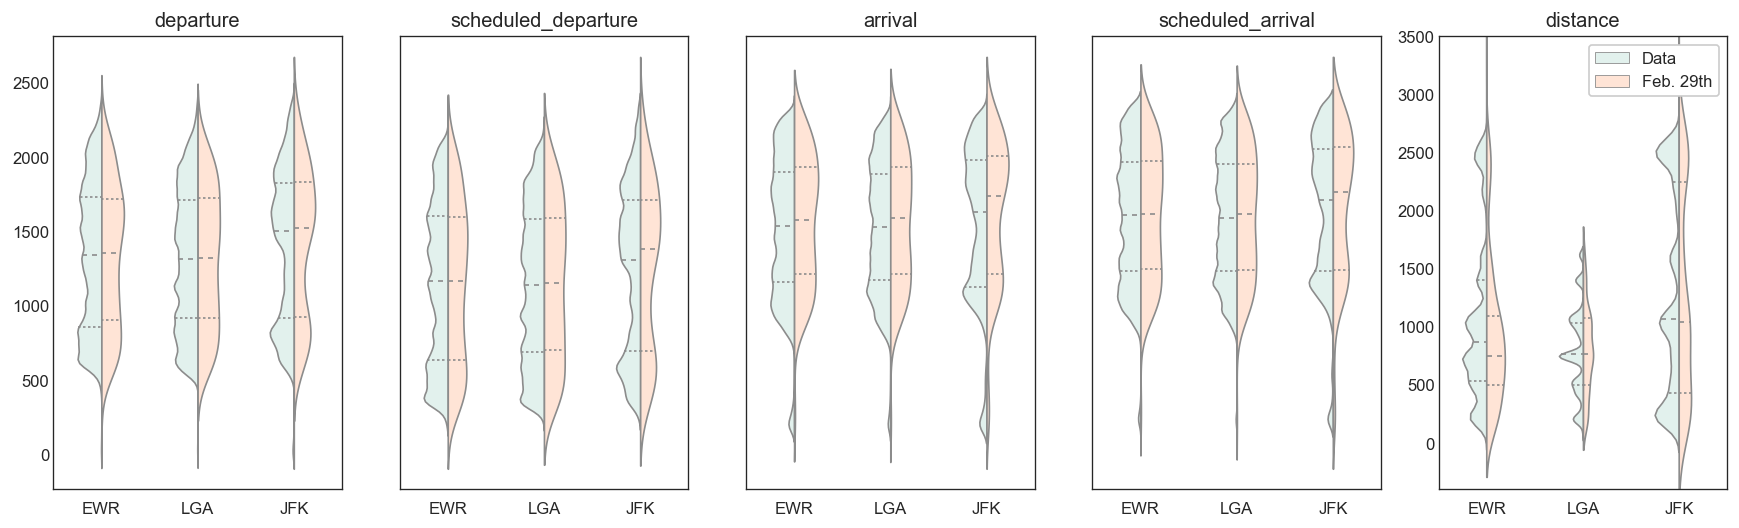

In [35]:
# Set color style
sns.set_palette(sns.color_palette([cyan_tones1[4], orange_shades[-2]]))

fig = plt.figure(figsize=(18,5), dpi=120)

plt.subplot(151)
ax1 = sns.violinplot(x='origin', 
                     y='departure',
                     hue='feb_29', 
                     data=flights_df_clean, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1, 
                     saturation=1)
ax1.legend_.remove()
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_title('departure')
ax1.tick_params(axis='y', pad=-1)

plt.subplot(152)
ax2 = sns.violinplot(x='origin', 
                     y='scheduled_departure',  
                     hue='feb_29', 
                     data=flights_df_clean, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1, 
                     saturation=1)
ax2.legend_.remove()
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('scheduled_departure')

plt.subplot(153)
ax3 = sns.violinplot(x='origin', 
                     y='arrival', 
                     hue='feb_29', 
                     data=flights_df_clean, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1, 
                     saturation=1)
ax3.legend_.remove()
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_title('arrival')

plt.subplot(154)
ax4 = sns.violinplot(x='origin', 
                     y='scheduled_arrival',  
                     hue='feb_29', 
                     data=flights_df_clean, 
                     split=True, 
                     inner="quart",
                     width=.5,
                     linewidth=1, 
                     saturation=1)
ax4.legend_.remove()
ax4.set_yticklabels([])
ax4.set_ylabel('', labelpad=-2)
ax4.set_xlabel('')
ax4.set_title('scheduled_arrival')

plt.subplot(155)
ax5 = sns.violinplot(x='origin', 
                     y='distance',  
                     hue='feb_29', 
                     data=flights_df_clean, 
                     split=True,
                     inner="quart", 
                     width=.5,
                     linewidth=1, 
                     saturation=1)
ax5.set_ylabel('')
ax5.set_xlabel('')
ax5.set_title('distance')
ax5.set_ylim([-400, 3500])
ax5.tick_params(axis='y', pad=-1)

# Set legend
handles, _ = ax5.get_legend_handles_labels()
ax5.legend(handles, ["Data", "Feb. 29th"], loc='upper right', ncol=1, framealpha=1)


# Save our figure    
plt.savefig('Figures/feb-29-origin-violinplots.pdf', dpi=300)
;

**Notes:** <br>
- Time distributions look similar, except for arrival variable with higher time values on Feb. 29th.
- Distance distributions look different, with lower median and upper quartile values on Feb. 29th.
- We will compute hypothesis testing between both set to clarify our observations

#### Computing hypothesis testing on Feb. 29th vs the rest

In [36]:
descriptive_columns = ['departure','scheduled_departure','arrival','scheduled_arrival','distance']

# Create a dataframe with aggregate functions for our statistical hypothesis testing 
flights_descriptive_feb29 = flights_df_clean[descriptive_columns+['feb_29']].groupby('feb_29').agg(['mean', 
                                                                                                    'std', 
                                                                                                    'count'])
# Create a dataframe to store testing values
feb29_test_col = pd.MultiIndex.from_product([descriptive_columns, ['mean','t_test','p_value']])
feb29_test = pd.DataFrame(index=['feb_29','rest'], columns=feb29_test_col)
    
for col in descriptive_columns:
    mean1  = flights_descriptive_feb29[col,'mean'].iloc[0]
    std1   = flights_descriptive_feb29[col,'std'].iloc[0]
    count1 = flights_descriptive_feb29[col,'count'].iloc[0]
    
    mean2  = flights_descriptive_feb29[col,'mean'].iloc[1]
    std2   = flights_descriptive_feb29[col,'std'].iloc[1]
    count2 = flights_descriptive_feb29[col,'count'].iloc[1]
    
    # t-test from scipy
    t_test, p_val = ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=count1, 
                                         mean2=mean2, std2=std2, nobs2=count2)
        
    feb29_test[col,'mean'].iloc[1] = mean2
    feb29_test[col,'t_test'].iloc[1] = 0
    feb29_test[col,'p_value'].iloc[1] = 1

    feb29_test[col,'mean'].iloc[0] = mean1
    feb29_test[col,'t_test'].iloc[0] = t_test
    feb29_test[col,'p_value'].iloc[0] = '{:.2E}'.format(p_val)
    
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(feb29_test)


departure                  scheduled_departure                   \
            mean t_test   p_value                mean t_test   p_value   
feb_29   1348.85  -0.26  7.96E-01             1340.36  -0.54  5.92E-01   
rest     1352.95      0         1             1348.49      0         1   

       arrival                  scheduled_arrival                  distance  \
          mean t_test   p_value              mean t_test   p_value     mean   
feb_29 1502.00  -3.44  5.86E-04           1532.87  -0.86  3.90E-01  1048.96   
rest   1561.44      0         1           1546.75      0         1  1001.44   

                         
       t_test   p_value  
feb_29   1.99  4.64E-02  
rest        0         1

**Notes:** <br>
- Testing the null hypothesis that the two samples 'Feb. 29th' and the rest have the identical average values leads to the following results:
- For *departure*, *scheduled_departure*, and *scheduled_arrival*, p-values above a threshold of 1% (0.01) suggest that identical averages hypothesis cannot be rejected. 
- The p-value of *distance* = 0.046, and p-value of *arrival* = 0.00059, suggesting a high probability of Feb. 29th data having different average than the rest. 
- We will keep Feb.29th values and transform them into Feb.28th for the sake of this challenge. As we will see later, these data are associated with another anomaly in their time format.

**n.b.** <br>
- It could also be interesting to compare Feb. 29th with same day of the week, as it would be as a Feb. 28th (Thursday), or even as a Mar. 1st (Friday). 
- Furthermore, comparing Feb. 29th with end of the month values (as a Feb. 28th), or beginning of the month values (as a Mar. 1st) could also be interesting.

**Delete 'feb_29' column:**

In [37]:
flights_df_clean.drop(axis=0, columns='feb_29', inplace=True)

#### Replace Feb. 29th by Feb. 28th

In [38]:
flights_df_clean.loc[((flights_df_clean['month']==2) & (flights_df_clean['day']==29)), 'day'] = 28

#### Create date column

In [39]:
try:
    # get the date from year-month-day columns, and transform into pandas datetime format
    flights_date = pd.to_datetime(flights_df_clean[['year', 'month', 'day']], errors='raise')
    
    # identify location, to insert new date column
    date_loc = flights_df_clean.columns.get_loc('day') + 1
    
    # insert date column
    flights_df_clean.insert(loc=date_loc, column='date', value=flights_date)

# catching possible errors
except ValueError as e:
    print(e)

**Notes:** <br>
- No more error was raised when transforming to datetime. 

## Time analysis

**Inspecting time variable, to understand their nature and format:**

In [40]:
flights_df_clean[['departure','scheduled_departure','arrival','scheduled_arrival']].describe()

,departure,scheduled_departure,arrival,scheduled_arrival
count,328063.00,328063.00,328063.00,328063.00
mean,1348.86,1340.39,1502.17,1532.91
std,488.27,467.34,533.27,497.91
min,1.00,500.00,1.00,1.00
25%,907.00,905.00,1104.00,1122.00
50%,1400.00,1355.00,1536.00,1555.00
75%,1744.00,1729.00,1941.00,1944.00
max,2400.00,2359.00,2440.00,2359.00


**Notes:** <br>
- With values ranging from minimum 1 or 500, to maximum 2359, the nature of this data looks like **'hhmm'** time format. <br>
- Except for arrival column, reaching a maximum value of 2440.
- Let's have a look further...

#### Verify HHMM format

To ensure our time format is HHMM, computing the modulus %100 of a HHMM value should give us the MM, then lie between 0 and 59.

In [41]:
(flights_df_clean[['departure','scheduled_departure','arrival','scheduled_arrival']]%100).describe()

,departure,scheduled_departure,arrival,scheduled_arrival
count,328063.00,328063.00,328063.00,328063.00
mean,31.75,26.24,29.59,29.05
std,18.23,19.30,17.49,17.42
min,0.00,0.00,0.00,0.00
25%,16.00,8.00,14.00,14.00
50%,31.00,29.00,30.00,30.00
75%,49.00,44.00,45.00,45.00
max,59.00,59.00,99.00,59.00


**Notes:** <br>
- *departure*, *scheduled_departure*, and *scheduled_arrival* look free from any format anomaly, with maximum values of 59.
- with a max value of 99, *arrival* contain abnormal time values
<br>
Let's look at those anomalies further...

In [42]:
flights_df_clean[flights_df_clean['arrival']%100 > 60].describe()

,year,month,day,departure,scheduled_departure,arrival,scheduled_arrival,flight_id,distance
count,631.00,631.00,631.00,631.00,631.00,631.00,631.00,631.00,631.00
mean,2013.00,2.00,28.00,1346.96,1342.16,1572.87,1547.72,1960.71,1043.56
std,0.00,0.00,0.00,481.79,474.11,498.88,499.22,1638.45,728.23
min,2013.00,2.00,28.00,457.00,500.00,75.00,5.00,1.00,94.00
25%,2013.00,2.00,28.00,909.00,900.00,1164.00,1124.50,516.50,509.00
50%,2013.00,2.00,28.00,1416.00,1357.00,1594.00,1557.00,1462.00,888.00
75%,2013.00,2.00,28.00,1743.50,1740.00,1991.50,2001.50,3751.00,1389.00
max,2013.00,2.00,28.00,2359.00,2359.00,2399.00,2357.00,5736.00,4983.00


**Notes:** <br>
- Every arrival values with HHMM format anomalies belong to Feb. 28th, formerly Feb. 29th (of course...)
- Even if those HHMM anomalies for *arrival* represent only 631 rows of the 954 original Feb. 29th rows, this makes Feb. 29th date anomalies even more suspicious.
- It now seems more reasonable to get rid of all 954 rows originally dated on the Feb. 29th, and now Feb. 28th:

#### Drop Feb. 29th 

In [43]:
# Get Feb. 28th indexes
index_feb28 = flights_df_clean[ (flights_df_clean['month']==2) & (flights_df_clean['day']==28) ].index

# Delete Feb. 28th row indexes 
flights_df_clean.drop(index_feb28, inplace=True)

### Change time format

We will transform the format of our time variables from HHMM to minutes after midnight (00:00 = 0 minutes).

**Convert HHMM time format into minutes**

In [44]:
def hhmm_to_minutes(x):
    return x%100 + 60*(x//100)

#### Change time values into minutes after midnight

In [45]:
time_columns = ['departure', 'scheduled_departure', 'arrival', 'scheduled_arrival']

for time_column in time_columns:
    flights_df_clean[time_column] = flights_df_clean[time_column].apply(hhmm_to_minutes)

## Delays

**Notes:** <br>
- There are many ways to compute delay values. We could transform the time columns into a pandas datetime format, or python native datetime format, then calculate the delay as a time delta between *departure* and *scheduled_departure* for instance. 
- Instead, we will keep time values as integers, and compute the delay in minutes.

### Delay calculation

In [46]:
try:
    # compute departure delay in minutes
    departure_delay = flights_df_clean['departure'] - flights_df_clean['scheduled_departure']
    
    # identify location; where to insert new departure_delay column
    departure_delay_loc = flights_df_clean.columns.get_loc('scheduled_departure') + 1
    
    # insert departure_delay 
    flights_df_clean.insert(loc=departure_delay_loc, 
                            column='departure_delay', 
                            value=departure_delay)

# catching possible errors, and updating values if column already exists
except ValueError as e: 
    flights_df_clean['departure_delay'] = flights_df_clean['departure'] - flights_df_clean['scheduled_departure']
    print(e)
    

In [47]:
try:
    # compute departure delay
    arrival_delay = flights_df_clean['arrival'] - flights_df_clean['scheduled_arrival']
    
    # identify location; where to insert new departure_delay column
    arrival_delay_loc = flights_df_clean.columns.get_loc('scheduled_arrival') + 1
    
    # insert departure_delay
    flights_df_clean.insert(loc=arrival_delay_loc, 
                            column='arrival_delay', 
                            value=arrival_delay)

# catching possible errors, and updating values if column already exists     
except ValueError as e:
    flights_df_clean['arrival_delay'] = flights_df_clean['arrival']  - flights_df_clean['scheduled_arrival'] 
    print(e)

In [48]:
flights_df_clean[['departure_delay','arrival_delay']].describe()

,departure_delay,arrival_delay
count,327109.00,327109.00
mean,7.29,-18.35
std,87.05,202.86
min,-1438.00,-1438.00
25%,-5.00,-18.00
50%,-2.00,-6.00
75%,10.00,12.00
max,911.00,1439.00


**Notes:** <br>
- A negative delay of -1438 minutes (-23h58) is unrealistic.
- We will inspect and try to correct delays.

#### Departure delay correction

In [49]:
flights_df_clean[(flights_df_clean['departure_delay'] < -720)].loc[:,'departure':'arrival_delay'].head()

,departure,scheduled_departure,departure_delay,arrival,scheduled_arrival,arrival_delay
842,42.00,1439,-1397.00,318.00,282,36.00
843,86.00,1370,-1284.00,153.00,1439,-1286.00
1785,32.00,1439,-1407.00,304.00,282,22.00
1786,50.00,1305,-1255.00,123.00,1391,-1268.00
1787,155.00,1439,-1284.00,420.00,277,143.00


**Notes:** <br>
- As anticipated, negative departure_delay close to -1440 minutes correspond to flights with *scheduled_departure* before midnight and *departure* after midnight.
- These delays are in reality of only a few minutes.
- We need to correct these *departure_delay* values by adding +1440 minutes.
- A flight leaving more than 45 minutes before scheduled in unrealistic. We will transform *departure_delay* < -45 minutes to their true value, by adding +1440 minutes:

In [50]:
flights_df_clean[ (flights_df_clean['departure_delay'] < -45) ].describe()[['departure',
                                                                            'scheduled_departure',
                                                                            'departure_delay']]

,departure,scheduled_departure,departure_delay
count,1205.00,1205.00,1205.00
mean,53.25,1325.86,-1272.61
std,82.01,108.41,154.66
min,1.00,540.00,-1438.00
25%,13.00,1260.00,-1381.00
50%,31.00,1351.00,-1292.00
75%,62.00,1439.00,-1213.00
max,872.00,1439.00,-139.00


**Notes:** <br>
- Negative *departure_delay* < -45minutes represent 1205 values. <br>

In [51]:
# Update departure_delays
flights_df_clean.loc[(flights_df_clean['departure_delay'] < -45), 'departure_delay'] += 1440


In [52]:
flights_df_clean['departure_delay'].describe()

count   327109.00
mean        12.60
std         40.13
min        -43.00
25%         -5.00
50%         -2.00
75%         11.00
max       1301.00
Name: departure_delay, dtype: float64

**Notes:** <br>
- We now get a mean departure_delay of 12.60 minutes.
- Our median is -2 minutes, meaning most flights take off before scheduled.

**Arrival delays:** <br>
- A plane landing more than 45 minutes before scheduled is more likely, especially when it took off up to 45 minutes before scheduled. <br>
- Let's fix the cut off to 2 hours, and change arrival_delay < -120 minutes to their actual positive values:

In [53]:
flights_df_clean[ (flights_df_clean['arrival_delay'] < -120) ].head()

,year,month,day,date,departure,scheduled_departure,departure_delay,arrival,scheduled_arrival,arrival_delay,carrier,flight_id,origin,destination,distance
151,2013,1,1,2013-01-01,528.00,1115,853.00,601.00,1190,-589.00,MQ,3944,JFK,BWI,184
725,2013,1,1,2013-01-01,1179.00,1120,59.00,29.00,1311,-1282.00,9E,3325,JFK,DFW,1391
791,2013,1,1,2013-01-01,1258.00,1260,-2.00,8.00,1439,-1431.00,UA,1241,EWR,TPA,997
805,2013,1,1,2013-01-01,1281.00,1240,41.00,6.00,1403,-1397.00,B6,227,EWR,MCO,937
810,2013,1,1,2013-01-01,1294.00,1245,49.00,20.00,1432,-1412.00,UA,1106,EWR,FLL,1065


In [54]:
flights_df_clean[ (flights_df_clean['arrival_delay'] < -120) ].describe()

,year,month,day,departure,scheduled_departure,departure_delay,arrival,scheduled_arrival,arrival_delay,flight_id,distance
count,6603.00,6603.00,6603.00,6603.00,6603.00,6603.00,6603.00,6603.00,6603.00,6603.00,6603.00
mean,2013.00,6.49,15.97,1218.49,1219.12,121.06,54.37,1369.52,-1315.16,1786.85,1168.66
std,0.00,3.17,8.32,356.68,84.13,104.59,64.03,73.00,102.46,1650.21,769.96
min,2013.00,1.00,1.00,1.00,479.00,-43.00,1.00,620.00,-1438.00,4.00,80.00
25%,2013.00,4.00,9.00,1265.00,1175.00,48.00,15.00,1336.00,-1386.00,485.00,569.00
50%,2013.00,6.00,17.00,1318.00,1230.00,103.00,37.00,1386.00,-1333.00,1178.00,1005.00
75%,2013.00,8.00,23.00,1373.00,1267.00,171.00,73.00,1431.00,-1270.00,3429.00,1598.00
max,2013.00,12.00,31.00,1440.00,1375.00,1301.00,967.00,1439.00,-168.00,6120.00,4983.00


In [55]:
# Update arrival_delays
flights_df_clean.loc[(flights_df_clean['arrival_delay'] < -120), 'arrival_delay'] += 1440

In [56]:
flights_df_clean['arrival_delay'].describe()

count   327109.00
mean        10.71
std         82.30
min        -86.00
25%        -17.00
50%         -5.00
75%         14.00
max       1439.00
Name: arrival_delay, dtype: float64

**Notes:**
- We now get a mean arrival_delay of 10.71 minutes, and a median of -5 minutes, meaning most flights land before scheduled.
- The same kind of mistake could happen in the other way; scheduled arrival before midnight (23xx) for actual arrival after midnight (00xx), mistakenly leading to arrival_delay close to 1440minutes (24hours).
- Let's inspect this:

In [57]:
flights_df_clean[(flights_df_clean['arrival_delay'] > 1320)].loc[:,'departure':'arrival_delay'].head()

,departure,scheduled_departure,departure_delay,arrival,scheduled_arrival,arrival_delay
774,1235.00,1230,5.00,1417.00,5,1412.00
795,1263.00,1270,-7.00,1425.00,17,1408.00
1736,1273.00,1270,3.00,1426.00,17,1409.00
1765,1361.00,1365,-4.00,1430.00,5,1425.00
2661,1289.00,1290,-1.00,1406.00,18,1388.00


**Notes:** <br>
- Flights with *arrival_delay* > 1320 minutes correspond to *scheduled_arrival* after midnight, and actual *arrival* before midnight. Then leading to an large and incorect *arrival_delay*.
- We can then correct *arrival_delay* with wrong values, by selecting those above 1320 minutes, that are crossing midnight between scheduled and actual *arrival* (*scheduled_arrival* < *arrival*). We could add another filter, by selecting flights with *departure_delay* < 120 minutes, which are even less likely to have *arrival_delay* > 1320 minutes

In [58]:
idx = flights_df_clean[(flights_df_clean['arrival_delay'] > 1320) 
                       & (flights_df_clean['scheduled_arrival'] < flights_df_clean['arrival'])
                       & (flights_df_clean['departure_delay'] < 120) 
                      ].index

flights_df_clean.loc[idx, 'arrival_delay'] -= 1440

### Delay analysis

Now that we have cleaned (most of) our delay anomalies, we can analyse those delays properly:

In [59]:
flights_df_clean.describe()

,year,month,day,departure,scheduled_departure,departure_delay,arrival,scheduled_arrival,arrival_delay,flight_id,distance
count,327109.00,327109.00,327109.00,327109.00,327109.00,327109.00,327109.00,327109.00,327109.00,327109.00,327109.00
mean,2013.00,6.58,15.70,822.01,814.72,12.60,912.99,931.34,7.31,1943.27,1048.96
std,0.00,3.41,8.76,292.74,281.14,40.13,320.22,299.25,45.52,1621.52,736.04
min,2013.00,1.00,1.00,1.00,300.00,-43.00,1.00,1.00,-86.00,1.00,80.00
25%,2013.00,4.00,8.00,547.00,545.00,-5.00,664.00,682.00,-17.00,544.00,509.00
50%,2013.00,7.00,16.00,840.00,835.00,-2.00,935.00,954.00,-5.00,1468.00,888.00
75%,2013.00,10.00,23.00,1064.00,1049.00,11.00,1180.00,1184.00,14.00,3412.00,1391.00
max,2013.00,12.00,31.00,1440.00,1439.00,1301.00,1440.00,1439.00,1272.00,8500.00,4983.00


#### Delays distribution plots

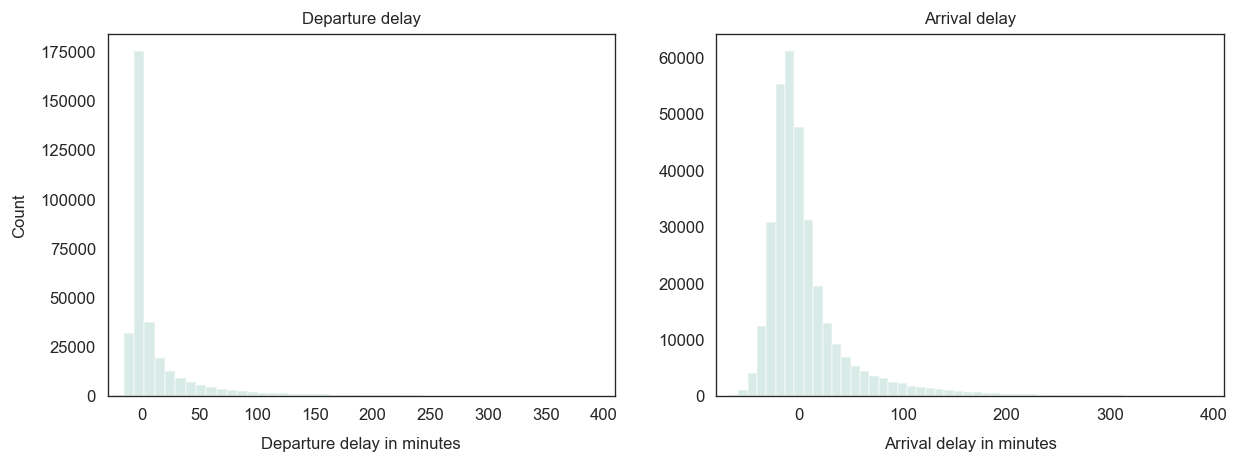

In [60]:
# Colors
sns.set_palette(sns.color_palette([cyan_tones1[0]]))

fig = plt.figure(figsize=(12, 4), dpi=(120))

# Distribution plot of scheduled air time
plt.subplot(121)
sns.distplot(flights_df_clean['departure_delay'], kde=False, bins=150)

# Set figure parameters
plt.xlabel('Departure delay in minutes')
plt.ylabel('Count')
plt.xlim([-30, 410])
plt.title('Departure delay', fontsize=10)

# Distribution plot of actual air time
plt.subplot(122)
sns.distplot(flights_df_clean['arrival_delay'], kde=False, bins=150)

# Set figure parameters
plt.xlabel('Arrival delay in minutes')
plt.ylabel('')
plt.xlim([-80, 410])
plt.title('Arrival delay', fontsize=10)

# Save our figure    
plt.savefig('Figures/delays-distribution-plot.pdf', dpi=300)

**Notes:** <br>
- We see both departure and arrival delays highly concentrated around 0 minutes, with a much higher variance in arrival delays

### Delays correlation

We expect a correlation between departure and arrival delays. We will create a scatter plot of those two variables.

''

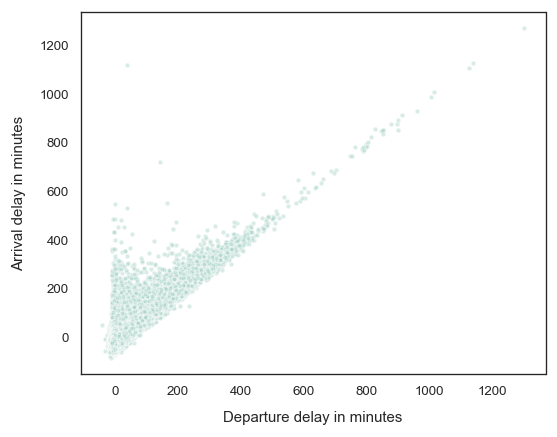

In [62]:
sns.set_palette(sns.color_palette([cyan_tones1[0]])) 

fig = plt.figure(figsize=(5, 4), dpi=120)

# Actual airtime vs. distance scatterplot
# --
sns.scatterplot(flights_df_clean['departure_delay'], 
                flights_df_clean['arrival_delay'], 
                alpha=.4,
                s=8)

plt.xlabel('Departure delay in minutes', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Arrival delay in minutes', fontsize=9)

# Save our figure    
plt.savefig('Figures/delays-correlation.png', dpi=600)
;

**Notes:** <br>
- As expected, the scatter plot suggests a positive linear relationship between departure delay and arrival delay. 
- We can visualize the variability of arrival delays for a fix departure delay, which seems even more pronounced for short departure delays.

# Flight distance influence on delay

''

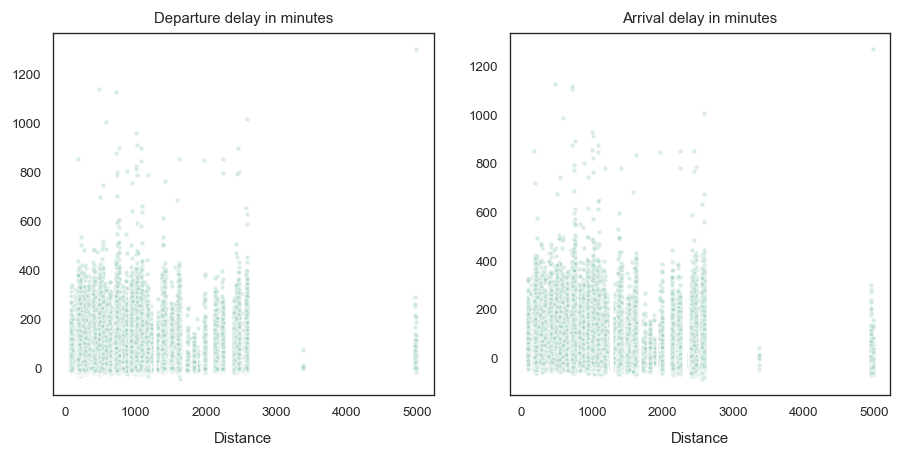

In [64]:
sns.set_palette(sns.color_palette([cyan_tones1[0]])) 

fig = plt.figure(figsize=(9, 4), dpi=120)

# Actual airtime vs. distance scatterplot
# --
plt.subplot(121)
sns.scatterplot(flights_df_clean['distance'], 
                flights_df_clean['departure_delay'], 
                alpha=.4,
                s=8)

plt.xlabel('Distance', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('')
plt.title('Departure delay in minutes', fontsize=9)

plt.subplot(122)
sns.scatterplot(flights_df_clean['distance'], 
                flights_df_clean['arrival_delay'], 
                alpha=.4,
                s=8)

plt.xlabel('Distance', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('')
plt.title('Arrival delay in minutes', fontsize=9)

# Save our figure    
plt.savefig('Figures/distance-vs-delay-scatterplot-1.png', dpi=600)
;

**Notes:** <br>
- A plot with all values of distance and delays as above is rather hard to interpret.
- For a fix distance value, both departure and arrival have high variances, which seem to slightly decrease as distance increase
- We will fit a model below to better understand the relationship between distance and delay: 

### Departure delay vs. distance - linear regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics


X_dist = flights_df_clean['distance'].values.reshape(-1, 1)

y_dep_delay = flights_df_clean['departure_delay'].values 

# Split data in training set and test set of 70% and 30% of the flights data respectively.
X_dist_train, X_dist_test, y_dep_delay_train, y_dep_delay_test = train_test_split(X_dist, 
                                                                                  y_dep_delay, 
                                                                                  test_size= 0.3)

# Pre-processing/Scaling distance variable
scaler = preprocessing.StandardScaler().fit(X_dist_train)
scaler.transform(X_dist_train)
scaler.transform(X_dist_test)

linear_regression_dep_delay = LinearRegression()

# Fit a linear model with OLS criteria
linear_regression_dep_delay.fit(X_dist_train, y_dep_delay_train)

# Compute predictions on test data
predictions_dep_delay = linear_regression_dep_delay.predict(X_dist_test)

MAE_dep  = metrics.mean_absolute_error(y_dep_delay_test, predictions_dep_delay)
MSE_dep  = metrics.mean_squared_error(y_dep_delay_test, predictions_dep_delay)
RMSE_dep = np.sqrt(MSE_dep)
R2_dep   = linear_regression_dep_delay.score(X_dist_test, y_dep_delay_test)

print("Linear model: \ndeparture_delay = {:.3f} + {:.4f}*distance\n".format(linear_regression_dep_delay.intercept_, 
                                                                            linear_regression_dep_delay.coef_[0]))

print("R2  : {:.5f} ".format(R2_dep))
print("MAE : {:.2f}".format(MAE_dep))
print("MSE : {:.2f}".format(MSE_dep))
print("RMSE: {:.2f}".format(RMSE_dep))

Linear model: 
departure_delay = 13.675 + -0.0010*distance

R2  : 0.00066 
MAE : 23.08
MSE : 1625.37
RMSE: 40.32


### Arrival delay vs. distance - linear regression

In [66]:
X_dist = flights_df_clean['distance'].values.reshape(-1, 1)

y_arr_delay = flights_df_clean['arrival_delay'].values 

# Split data in training set and test set of 70% and 30% of the flights data respectively.
X_dist_train, X_dist_test, y_arr_delay_train, y_arr_delay_test = train_test_split(X_dist, 
                                                                                  y_arr_delay, 
                                                                                  test_size= 0.3)

# Pre-processing/Scaling distance variable
scaler = preprocessing.StandardScaler().fit(X_dist_train)
scaler.transform(X_dist_train)
scaler.transform(X_dist_test)

linear_regression_arr_delay = LinearRegression()

# Fit a linear model with OLS criteria
linear_regression_arr_delay.fit(X_dist_train, y_arr_delay_train)

# Compute predictions on test data
predictions_arr_delay = linear_regression_arr_delay.predict(X_dist_test)

MAE_arr  = metrics.mean_absolute_error(y_arr_delay_test, predictions_arr_delay)
MSE_arr  = metrics.mean_squared_error(y_arr_delay_test, predictions_arr_delay)
RMSE_arr = np.sqrt(MSE_dep)
R2_arr   = linear_regression_arr_delay.score(X_dist_test, y_arr_delay_test)

print("Linear model: \narrival_delay = {:.3f} + {:.4f}*distance\n".format(linear_regression_arr_delay.intercept_, 
                                                                          linear_regression_arr_delay.coef_[0]))

print("R2  : {:.5f} ".format(R2_arr))
print("MAE : {:.2f}".format(MAE_arr))
print("MSE : {:.2f}".format(MSE_arr))
print("RMSE: {:.2f}".format(RMSE_arr))

Linear model: 
arrival_delay = 10.948 + -0.0035*distance

R2  : 0.00411 
MAE : 28.28
MSE : 2067.94
RMSE: 40.32


**Notes:**  <br>
- Our 2 linear regression model indicate a negative influence of distance on delay.
- The models also indicate the distance influence on delay is more than 3 times greater on arrival_delay than on departure_delay.
- According to the models, a flight with a distance increase of 1000 (miles) would have departure delay decrease of 1.2 minute, and arrival delay decrease of 3.5 minutes, on average.
- This relationship may be due to the fact that among factors affecting delays, aircraft preparation, technical issues, or even late arrival from previous connection is an impactful factor. Long distance flights may be less subject to these causes. <br>
- Another assumption for this relationship may be linked to the fact that airline companies must compensate passengers for delayed flights. This compensation being certainly proportional to the flight ticket price, hence the flight distance. Paying higher compensation for longer distance flights may lead to airline companies to overestimate flight durations, in addition to be more careful.
<br>
- But to be honest, I am not shure about the nature of this relationship. <br> <br>
- Our linear models fitting the data rather poorly, with very low coefficient of determination, and high errors. Let's analyse if we can identify a cause for this lack of fit:

**Residual analysis**

''

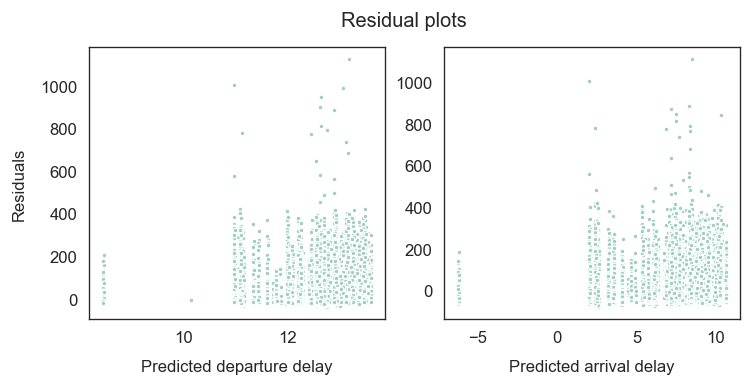

In [67]:
sns.set_palette(sns.color_palette([cyan_tones1[0]]))
figure = plt.figure(figsize=(7,3), dpi=120)
plt.suptitle('Residual plots')

plt.subplot(121)
sns.scatterplot(x = predictions_dep_delay, 
                y = (y_dep_delay_test - predictions_dep_delay), 
                s = 8)
plt.ylabel('Residuals')
plt.xlabel('Predicted departure delay')

plt.subplot(122)
sns.scatterplot(x = predictions_arr_delay, 
                y = (y_arr_delay_test - predictions_arr_delay), 
                s = 8)
plt.ylabel('')
plt.xlabel('Predicted arrival delay')



plt.savefig('Figures/residuals-delay-distance-linear.pdf',dpi=300,transparency=True)
;

**Log transform of delays**

Previous linear model have a poor quality of fit. Let's inspect our distance variable.

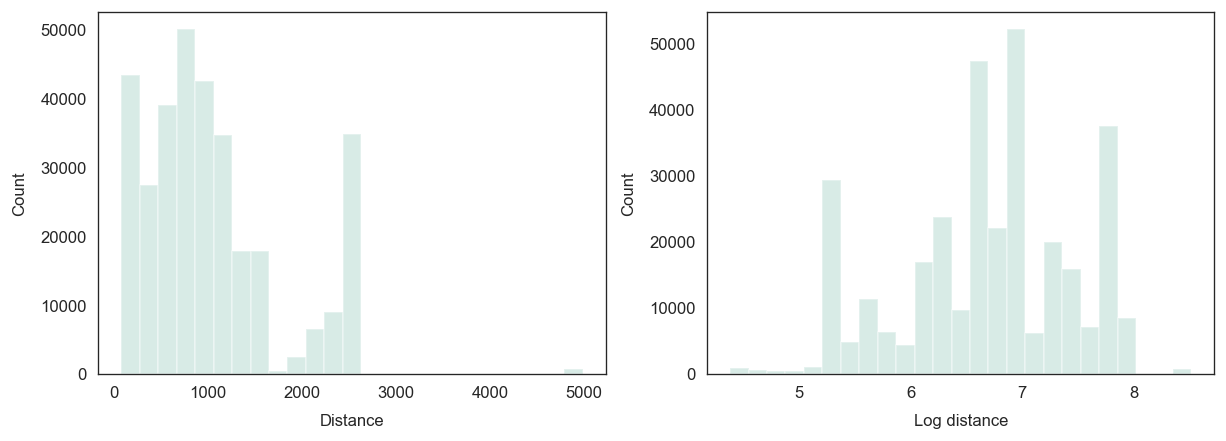

In [68]:
# Colors
sns.set_palette(sns.color_palette([cyan_tones1[0]]))

flights_df_clean['log_distance'] = np.log(flights_df_clean['distance'])

fig = plt.figure(figsize=(12, 4), dpi=(120))
plt.subplot(121)
# Distribution plot of scheduled air time
sns.distplot(flights_df_clean['distance'], kde=False, bins=25)

# Set figure parameters
plt.xlabel('Distance')
plt.ylabel('Count')

plt.subplot(122)
# Distribution plot of scheduled air time
sns.distplot(flights_df_clean['log_distance'], kde=False, bins=25)

# Set figure parameters
plt.xlabel('Log distance')
plt.ylabel('Count')


# Save our figure    
plt.savefig('Figures/distance-distribution-log.pdf', dpi=300)

**Notes:** <br>
- Flight distance histograms above suggest that the original distance distribution does not follow a normal distribution, which is a fundamental hypothesis for OLS linear regression. 
- Transforming distance by computing its logarithm appear a little closer from a normal distribution.
- Despite that, linear regression as a function of log(distance) does not provide a better fit, but achieve even higher errors and lower coefficient of determination.
- A polynomial model of 2nd degree of the distance (quadratic) did not improve the quality significantly.

## NY airport vs. delay 

#### Create dummy variables for origins

In order to create a model with categorical variable *origin*, we will need to code this variable into new ones with numeric values. <br>
To do so, we will use the get_dummies function in Pandas: <br>

In [69]:
origin_dummies = pd.get_dummies(flights_df_clean['origin'], drop_first=True)
flights_df_clean = pd.concat([flights_df_clean, origin_dummies], axis=1)

#### Departure delay vs. origin - linear regression

In [70]:
X = flights_df_clean[['distance','JFK','LGA']]

y_dep = flights_df_clean['departure_delay']

X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_dep, test_size=0.3)

linear_regression_dep = LinearRegression()
linear_regression_dep.fit(X_train_dep, y_train_dep)
predictions_dep = linear_regression_dep.predict(X_test_dep)

MAE_dep  = metrics.mean_absolute_error(y_test_dep, predictions_dep)
MSE_dep  = metrics.mean_squared_error(y_test_dep, predictions_dep)
RMSE_dep = np.sqrt(MSE_dep)
R2_dep   = linear_regression_dep.score(X_test_dep, y_test_dep)

print("departure_delay = {:.2f} + {:.4f}*distance + {:.2f}*JFK + {:.2f}*LGA\n".format(linear_regression_dep.intercept_, 
                                                                                    linear_regression_dep.coef_[0], 
                                                                                    linear_regression_dep.coef_[1], 
                                                                                    linear_regression_dep.coef_[2],
                                                                                   ))

print("R2  : {:.5f}".format(R2_dep))
print("MAE : {:.3f}".format(MAE_dep))
print("MSE : {:.3f}".format(MSE_dep))
print("RMSE: {:.3f}".format(RMSE_dep))

departure_delay = 16.71 + -0.0016*distance + -2.66*JFK + -5.31*LGA

R2  : 0.00290
MAE : 23.073
MSE : 1619.056
RMSE: 40.237


#### Arrival delay vs. origin - linear regression

In [71]:
X = flights_df_clean[['distance','JFK','LGA']]

y_arr = flights_df_clean['arrival_delay']

X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(X, y_arr, test_size= 0.3)

linear_regression_arr = LinearRegression()
linear_regression_arr.fit(X_train_arr, y_train_arr)
predictions_arr = linear_regression_arr.predict(X_test_arr)

MAE_arr  = metrics.mean_absolute_error(y_test_arr, predictions_arr)
MSE_arr  = metrics.mean_squared_error(y_test_arr, predictions_arr)
RMSE_arr = np.sqrt(MSE_arr)
R2_arr   = linear_regression_arr.score(X_test_arr, y_test_arr)

print("arrival_delay = {:.2f} + {:.4f}*distance + {:.2f}*JFK + {:.2f}*LGA\n".format(linear_regression_arr.intercept_, 
                                                                                  linear_regression_arr.coef_[0], 
                                                                                  linear_regression_arr.coef_[1], 
                                                                                  linear_regression_arr.coef_[2]))

print("R2  : {:.5f}".format(R2_arr))
print("MAE : {:.3f}".format(MAE_arr))
print("MSE : {:.3f}".format(MSE_arr))
print("RMSE: {:.3f}".format(RMSE_arr))

arrival_delay = 13.67 + -0.0040*distance + -2.60*JFK + -4.31*LGA

R2  : 0.00511
MAE : 28.280
MSE : 2063.524
RMSE: 45.426


**Notes:** <br>
- These linear regressions suggest that the best origin airport in term of delays is ***LGA***
- Flights taking off from *LGA* have -5.03 minutes departure_delay than *ERW* on average, for fixed distance. And -2.32 minutes (5.03m - 2.71m) less departure_delay than *JFK*.
- For arrival delay, flights from *LGA* have -4.72 minutes less delay than *ERW*, and -1.81 minutes less than *JFK*.

### Box plots of delays vs. origin airport

''

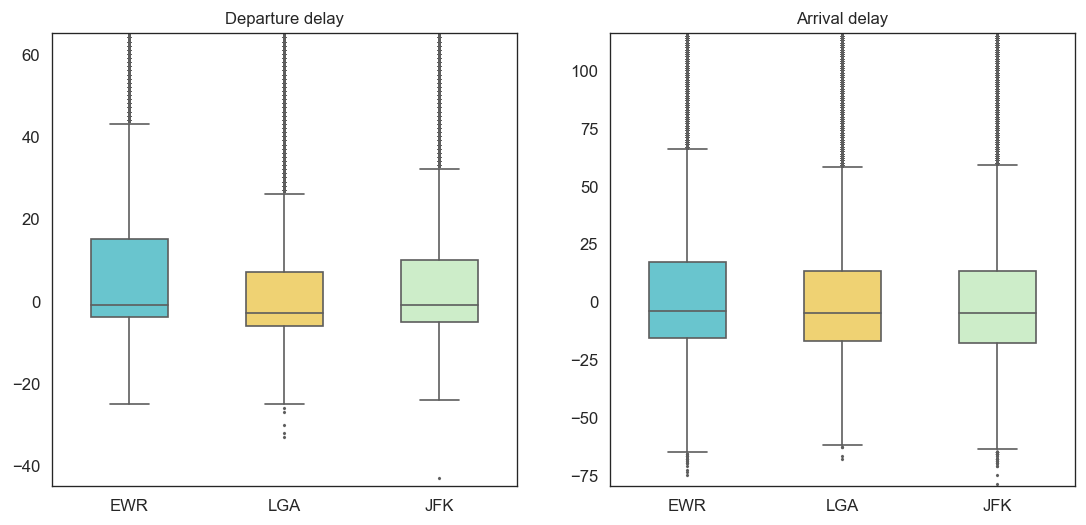

In [72]:
# Set color palette
palette = sns.set_palette(sns.color_palette([cyan_compl[4],
                                             cyan_compl[2], 
                                             cyan_compl[-2]])) 

plt.figure(figsize=(11, 5), dpi=120)

# departure delay boxplot
# --
plt.subplot(121)
ax1 = sns.boxplot(x='origin', 
                  y='departure_delay', 
                  data=flights_df_clean, 
                  fliersize=1, 
                  width=.5, 
                  linewidth=1,
                  saturation=.8)

ax1.set_ylim([-45, 65])
plt.xlabel('')
plt.ylabel('')
plt.title('Departure delay', fontsize=10)

# arrival delay boxplot
# --
plt.subplot(122)
ax2 = sns.boxplot(x='origin', 
                  y='arrival_delay', 
                  data=flights_df_clean, 
                  fliersize=1, 
                  width=.5, 
                  linewidth=1,
                  saturation=.8)

ax2.set_ylim([-80, 116])
plt.xlabel('')
plt.ylabel('')
plt.title('Arrival delay', fontsize=10)

plt.savefig('Figures/delays-vs-origin-boxplots.pdf', dpi=300, transparency=True)
;


#### Delayed flight vs NY airports

Let's divide our delay into a boolean value, considering that a flight is delayed when it's > 15 minutes late, and on time otherwise:

In [73]:
flights_df_clean['delayed_departure'] = (flights_df_clean['departure_delay'] > 15)
flights_df_clean['delayed_arrival'] = (flights_df_clean['arrival_delay'] > 15)

**Proportion of delayed flights (> 15 minutes), by origin:**

In [74]:
delayed_departure_prop = flights_df_clean.groupby("origin")['delayed_departure'].value_counts(normalize=True)
delayed_arrival_prop   = flights_df_clean.groupby("origin")['delayed_arrival'].value_counts(normalize=True)

pd.concat([delayed_departure_prop, delayed_arrival_prop], axis=1)

delayed_departure  delayed_arrival
origin delayed_departure                                    
EWR    False                           0.75             0.74
       True                            0.25             0.26
JFK    False                           0.79             0.77
       True                            0.21             0.23
LGA    False                           0.81             0.77
       True                            0.19             0.23

**Bar plot of delayed proportions, by origin.**

''

<Figure size 1080x600 with 0 Axes>

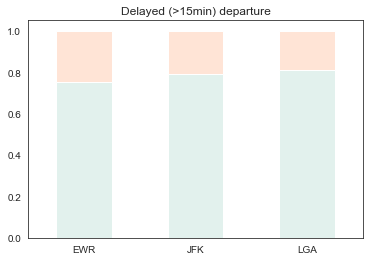

In [80]:
# Set color style
sns.set_palette(sns.color_palette([cyan_tones1[4], orange_shades[-2]]))
fig = plt.figure(figsize=(9, 5), dpi=120)

data = flights_df_clean.groupby("origin")['delayed_departure'].value_counts(normalize=True).unstack()
data.plot(kind='bar', stacked='True', legend=None)
#plt.legend(None)
plt.xlabel('')
plt.xticks(rotation=0)
plt.title('Delayed (>15min) departure')

plt.savefig('Figures/count-delayed-departure.pdf', dpi=300, transparency=True)
;

''

<Figure size 1080x600 with 0 Axes>

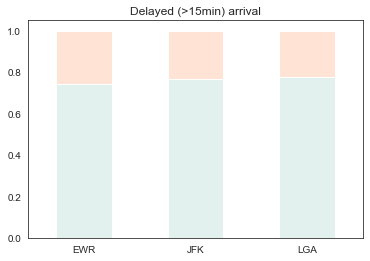

In [81]:
fig = plt.figure(figsize=(9, 5), dpi=120)

data = flights_df_clean.groupby("origin")['delayed_arrival'].value_counts(normalize=True).unstack()
data.plot(kind='bar', stacked='True', legend=None)
#plt.legend(loc='best')
plt.xlabel('')
plt.xticks(rotation=0)
plt.title('Delayed (>15min) arrival')

plt.savefig('Figures/count-delayed-arrival.pdf', dpi=300, transparency=True)
;

#### Best New York airport

- In addition to our previous linear regression models, box plots and proportion plots above confirm our observation: **La Guardi (LGA)** airport is the best option in terms of delays. 
- Flights from LGA airport have significantly lower departure delay, and arrival delay close but lower than EWR and JFK airports.

### Delay vs destination

In [76]:
flights_df_clean[['destination',
                  'departure_delay',
                  'arrival_delay']].groupby('destination').mean().sort_values(by='departure_delay', 
                                                                              ascending=False).head()

,departure_delay,arrival_delay
destination,,
TUL,34.91,34.96
CAE,34.22,42.32
OKC,29.80,32.94
BHM,29.15,17.06
TYS,28.29,23.99


In [77]:
flights_df_clean[['destination',
                  'departure_delay',
                  'arrival_delay']].groupby('destination').mean().sort_values(by='arrival_delay', 
                                                                              ascending=False).head()

,departure_delay,arrival_delay
destination,,
CAE,34.22,42.32
TUL,34.91,34.96
JAC,26.55,33.91
OKC,29.80,32.94
TYS,28.29,23.99


In [78]:
airports_df[(airports_df['FAA']=='TUL') | (airports_df['FAA']=='CAE')]

,FAA,name,latitude,longitude,altitude,UTC,DST,timezone
257,CAE,Columbia Metropolitan,33.94,-81.12,236,-5,US standard DST,America/New_York
1334,TUL,Tulsa Intl,36.20,-95.89,677,-6,US standard DST,America/Chicago


**Notes:** <br>
- With the highest departure AND arrival mean delay, both Tulsa (TUL) and Columbia Metropolitan (CAE) airports are among the worst destination in terms of delay, from New-York airports.

# Conclusion

By analyzing NYC flights data we were able to make the following observations:
- The data initially contained numerous anomalies, that needed to be treated as best as possible to minimize bias.
- We saw that flight distance had a moderate relationship on its delay, decreasing both departure and arrival delays with an increase in distance.
- We finally compared NYC airports (ERW, JFK, LGA), and saw that LaGuardia airport (LGA) was the best in terms of delays. 